# TSMOM Backtesting: 

Core question: Does a 1-month time-series momentum strategy outperform buy-and-hold for U.S. equities over the past 10 years?

In [132]:
import numpy as np 
import pandas as pd 
import yfinance as yf
import matplotlib.pyplot as plt 

## Data Ingestion

In [133]:
# MS=Morgan Stanley, BAC=Bank of America, ^GSPC=S&P500, JEF=Jefferies
tickers = ['JPM', 'MS', 'BAC', 'AAPL', 'MSFT', 'AMZN', 'TSLA', 'NFLX', 'HSBC', '^GSPC', 'UBS', 'JEF']
start_date = '2016-01-01'
end_date = '2026-01-01'

data = yf.download(tickers, start= start_date, end=end_date, auto_adjust=True)['Close']
data = data.reset_index().rename(columns={"index": "Date"})

m1m = data.copy()

# Lookback Variable: 1 month = 20 days
lookback = 20

#Let's add position columns, useful for backtesting 
og_pos = 0

m1m["AAPL_pos"]= og_pos
m1m["AMZN_pos"]= og_pos
m1m["BAC_pos"]= og_pos
m1m["HSBC_pos"]= og_pos
m1m["JEF_pos"]= og_pos
m1m["JPM_pos"]= og_pos
m1m["MS_pos"]= og_pos
m1m["MSFT_pos"]= og_pos
m1m["NFLX_pos"]= og_pos
m1m["TSLA_pos"]= og_pos
m1m["UBS_pos"]= og_pos
m1m["^GSPC_pos"]= og_pos

#let's add 1-month momentum columns, 
m1m["AAPL_mom"]= m1m["AAPL"].shift(1) / m1m["AAPL"].shift(lookback+1) -1
m1m["AMZN_mom"]= m1m["AMZN"].shift(1) / m1m["AMZN"].shift(lookback+1) -1
m1m["BAC_mom"]= m1m["BAC"].shift(1) / m1m["BAC"].shift(lookback+1) -1
m1m["HSBC_mom"]= m1m["HSBC"].shift(1) / m1m["HSBC"].shift(lookback+1) -1
m1m["JEF_mom"]= m1m["JEF"].shift(1) / m1m["JEF"].shift(lookback+1) -1
m1m["JPM_mom"]= m1m["JPM"].shift(1) / m1m["JPM"].shift(lookback+1) -1
m1m["MS_mom"]= m1m["MS"].shift(1) / m1m["MS"].shift(lookback+1) -1
m1m["MSFT_mom"]= m1m["MSFT"].shift(1) / m1m["MSFT"].shift(lookback+1) -1
m1m["NFLX_mom"]= m1m["NFLX"].shift(1) / m1m["NFLX"].shift(lookback+1) -1
m1m["TSLA_mom"]= m1m["TSLA"].shift(1) / m1m["TSLA"].shift(lookback+1) -1
m1m["UBS_mom"]= m1m["UBS"].shift(1) / m1m["UBS"].shift(lookback+1) -1
m1m["^GSPC_mom"]= m1m["^GSPC"].shift(1) / m1m["^GSPC"].shift(lookback+1) -1

# Track Cash Outflows and Inflows, as well as the equity value
m1m["Cash"]=0

[*********************100%***********************]  12 of 12 completed


In [134]:
m1m.head()

Ticker,Date,AAPL,AMZN,BAC,HSBC,JEF,JPM,MS,MSFT,NFLX,...,HSBC_mom,JEF_mom,JPM_mom,MS_mom,MSFT_mom,NFLX_mom,TSLA_mom,UBS_mom,^GSPC_mom,Cash
0,2016-01-04,23.753149,31.849501,13.196476,21.616356,11.806364,48.648827,23.715654,47.983459,10.996,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2016-01-05,23.157913,31.689501,13.196476,21.565937,11.834111,48.732952,23.564985,48.202362,10.766,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2016-01-06,22.704718,31.632500,12.915354,20.820932,11.653756,48.029453,22.977367,47.326740,11.768,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,2016-01-07,21.746477,30.396999,12.449502,20.384008,11.480334,46.087170,21.832264,45.680603,11.456,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2016-01-08,21.861475,30.352501,12.208543,20.249580,11.071070,45.054840,21.380249,45.820705,11.139,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


## Logic of the Strategy

In [135]:
tickers = ["AAPL","AMZN","BAC","HSBC","JEF","JPM","MS","MSFT","NFLX","TSLA","UBS","^GSPC"]

# If momentum > 0: then hold 1 share, if momentum < 0: then hold zero share

for i in range(1, len(m1m)):
    m1m.loc[m1m.index[i], "Cash"] = m1m.loc[m1m.index[i-1], "Cash"]

    for tkr in tickers:
        prev_pos = m1m.loc[m1m.index[i-1], f"{tkr}_pos"]
        mom = m1m.loc[m1m.index[i], f"{tkr}_mom"]

        target_pos = 1 if mom > 0 else 0
        trade = target_pos - prev_pos
        price_trade = m1m.loc[m1m.index[i-1], tkr]

        if trade == 1:
            m1m.loc[m1m.index[i], "Cash"] -= price_trade
        elif trade == -1:
            m1m.loc[m1m.index[i], "Cash"] += price_trade

        m1m.loc[m1m.index[i], f"{tkr}_pos"] = target_pos

C:\Users\Startklar\AppData\Local\Temp\ipykernel_21304\4007778107.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-21.907548904418945' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  m1m.loc[m1m.index[i], "Cash"] -= price_trade


## Daily PnL, Equity Value and Strategy Returns: 

Daily PnL: $PnL_t= \sum_t (\#Shares_t \cdot Price_t)$

Equity: $Equity_t=PnL_t + Cash_t$

Strategy Returns: $\frac{PnL_t}{Equity_{t-1}}$

In [136]:
# Adding a 'daily pnl' column 
m1m["PNL"]= m1m["AAPL_pos"].shift(1)*(m1m["AAPL"] - m1m["AAPL"].shift(1)) + m1m["AMZN_pos"].shift(1)*(m1m["AMZN"] - m1m["AMZN"].shift(1)) + m1m["BAC_pos"].shift(1)*(m1m["BAC"] - m1m["BAC"].shift(1)) + m1m["HSBC_pos"].shift(1)*(m1m["HSBC"] - m1m["HSBC"].shift(1)) + m1m["JEF_pos"].shift(1)*(m1m["JEF"] - m1m["JEF"].shift(1)) + m1m["JPM_pos"].shift(1)*(m1m["JPM"] - m1m["JPM"].shift(1)) + m1m["MS_pos"].shift(1)*(m1m["MS"] - m1m["MS"].shift(1)) + m1m["MSFT_pos"].shift(1)*(m1m["MSFT"] - m1m["MSFT"].shift(1)) + m1m["NFLX_pos"].shift(1)*(m1m["NFLX"] - m1m["NFLX"].shift(1)) + m1m["TSLA_pos"].shift(1)*(m1m["TSLA"] - m1m["TSLA"].shift(1)) + m1m["UBS_pos"].shift(1)*(m1m["UBS"] - m1m["UBS"].shift(1)) + m1m["^GSPC_pos"].shift(1)*(m1m["^GSPC"] - m1m["^GSPC"].shift(1))

# Computing the Equity Value 
m1m["Equity"]= m1m["PNL"] + m1m["Cash"]

# Computing the Strategy Returns
m1m["M1M_Return"]=0
for i in range(1, len(m1m)):
    equity_prev = m1m.iloc[i-1]["Equity"]

    if equity_prev > 0:
        m1m.iloc[i, m1m.columns.get_loc("M1M_Return")] = (m1m.iloc[i]["PNL"] / equity_prev)

C:\Users\Startklar\AppData\Local\Temp\ipykernel_21304\1711744199.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0010496148715737818' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  m1m.iloc[i, m1m.columns.get_loc("M1M_Return")] = (m1m.iloc[i]["PNL"] / equity_prev)


## Strategy Equity: 

$Equity_t = C_0 \cdot \prod_s (1+r_s)$

In [137]:
# Initial Capital 
c0 = 100000

m1m["Strat_Equity"] = c0 * (1 + m1m["M1M_Return"].fillna(0)).cumprod()

### Plotting  

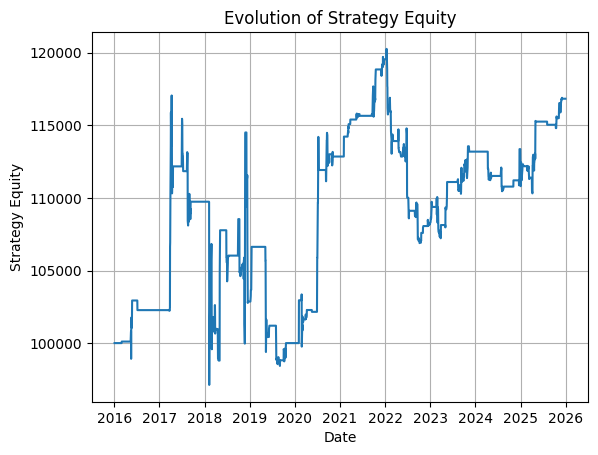

In [138]:
plt.figure()
plt.plot(m1m["Date"], m1m["Strat_Equity"])
plt.xlabel("Date")
plt.ylabel("Strategy Equity")
plt.title("Evolution of Strategy Equity")
plt.grid(True)
plt.show()

## Benchmark

Equal share (1 share of each stock) & Hold

In [139]:
benchmark = data.copy()

# We own 1 share of each stock and hold ! 
benchmark["Equity"] = benchmark["AAPL"] + benchmark["AMZN"] + benchmark["BAC"] + benchmark["HSBC"] + benchmark["JEF"] + benchmark["JPM"] + benchmark["MS"] + benchmark["MSFT"] + benchmark["NFLX"] + benchmark["TSLA"] + benchmark["UBS"] + benchmark["^GSPC"]

# We compute the strategy returns 
benchmark["Return"] = benchmark["Equity"].pct_change()

# We compute the strategy equity 
benchmark["Strat_Equity"] = c0 * (1 + benchmark["Return"].fillna(0)).cumprod()

In [140]:
benchmark.head()

Ticker,Date,AAPL,AMZN,BAC,HSBC,JEF,JPM,MS,MSFT,NFLX,TSLA,UBS,^GSPC,Equity,Return,Strat_Equity
0,2016-01-04,23.753149,31.849501,13.196476,21.616356,11.806364,48.648827,23.715654,47.983459,10.996,14.894000,13.594906,2012.660034,2274.714726,NaN,100000.000000
1,2016-01-05,23.157913,31.689501,13.196476,21.565937,11.834111,48.732952,23.564985,48.202362,10.766,14.895333,13.516735,2016.709961,2277.832267,0.001371,100137.051927
2,2016-01-06,22.704718,31.632500,12.915354,20.820932,11.653756,48.029453,22.977367,47.326740,11.768,14.602667,13.346175,1990.260010,2248.037672,-0.013080,98827.235165
3,2016-01-07,21.746477,30.396999,12.449502,20.384008,11.480334,46.087170,21.832264,45.680603,11.456,14.376667,13.005060,1943.089966,2191.985051,-0.024934,96363.074704
4,2016-01-08,21.861475,30.352501,12.208543,20.249580,11.071070,45.054840,21.380249,45.820705,11.139,14.066667,12.344148,1922.030029,2167.578807,-0.011134,95290.138217


### Plotting

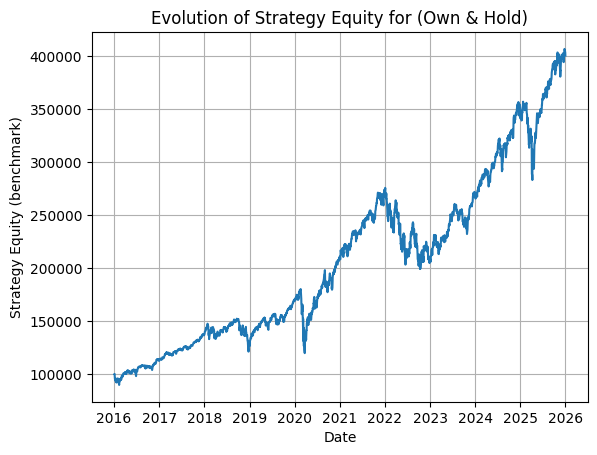

In [141]:
plt.figure()
plt.plot(benchmark["Date"], benchmark["Strat_Equity"])
plt.xlabel("Date")
plt.ylabel("Strategy Equity (benchmark)")
plt.title("Evolution of Strategy Equity for (Own & Hold)")
plt.grid(True)
plt.show()

## Performance Metrics

In [142]:
# We use equity not prices 
strategy_return =   m1m["Strat_Equity"].pct_change()
benchmark_return = benchmark["Strat_Equity"].pct_change()

# Annualized Return 
ann_ret_strategy = (1+ strategy_return.mean())**252 -1 
ann_ret_benchmark = (1 + benchmark_return.mean())**252 -1 

# Annualized Volatility
ann_vol_strategy = strategy_return.std() * np.sqrt(252)
ann_vol_benchmark = benchmark_return.std() * np.sqrt(252)

# Sharpe Ratio: Considering that the risk-free rate is equal to zero 
sharpe_strategy = ann_ret_strategy / ann_vol_strategy
sharpe_benchmark = ann_ret_benchmark / ann_vol_benchmark

# Maximum Drawdown 
def max_drawdown(equity): 
    running_max = equity.cummax()
    drawdown = equity / running_max -1
    return drawdown.min()

mdd_strategy = max_drawdown(m1m["Strat_Equity"])
mdd_benchmark = max_drawdown(benchmark["Strat_Equity"])

In [ ]:
performance = pd.DataFrame({ "Annual Return": [ann_ret_strategy, ann_ret_benchmark],
    "Annual Volatility": [ann_vol_strategy, ann_vol_benchmark],
    "Sharpe Ratio": [sharpe_strategy, sharpe_benchmark],
    "Max Drawdown": [mdd_strategy, mdd_benchmark]}, 
    index=["Momentum Strategy", "Buy & Hold Benchmark"])

performance

,Annual Return,Annual Volatility,Sharpe Ratio,Max Drawdown
Momentum Strategy,0.019982,0.091776,0.217723,-0.170349
Buy & Hold Benchmark,0.170481,0.190644,0.894236,-0.335595
